## fit different lipid-mediated protein protein interaction caused by different lipid enviroment

In [2]:
import sys
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
x = np.array([5.05, 5.25, 5.91, 6.54, 7.11, 7.68, 8.26, 8.85, 9.44, 10.01, 10.62, 11.17, 11.75, 12.32, 12.89, 13.46, 14.05, 14.66, 15.28, 15.87, 16.52, 17.12, 17.75, 18.38, 19.04, 19.61, 20.33, 20.94, 21.60, 22.23, 22.91, 23.50, 24.12, 24.77, 25.43, 26.02, 26.68, 27.29, 27.95, 28.58, 29.22, 29.87, 30.53, 31.21, 31.86, 32.39, 32.97, 33.54, 34.09, 34.60, 35.03])

In [3]:
y = [-7.82, -7.78, -7.41, -7.04, -6.63, -6.14, -5.57, -4.96, -4.43, -3.94, -3.41, -2.88, -2.27, -1.70, -1.09, -0.52, -0.07, 0.41, 0.82, 1.23, 1.60, 1.85, 2.10, 2.31, 2.40, 2.56, 2.53, 2.58, 2.55, 2.52, 2.40, 2.25, 2.10, 1.90, 1.67, 1.48, 1.24, 0.97, 0.82, 0.58, 0.39, 0.24, 0.12, -0.03, -0.06, -0.05, -0.05, -0.08, -0.07, -0.07, -0.06]

In [4]:
x += 5

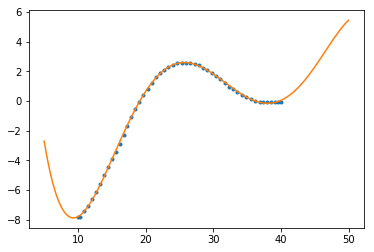

In [5]:
order = 5
plt.figure()
p = np.poly1d(np.polyfit(x, y, order))
xp = np.linspace(5, 50, 1000)
_ = plt.plot(x, y, '.', xp, p(xp), '-')

In [6]:
d = np.polyder(p, m=1)
roots = np.roots(d)
print(roots)

[ 51.80676989  38.03356301  25.7123811    9.32874381]


In [7]:
ynew = y - p(38.03356301)

In [8]:
p = np.poly1d(np.polyfit(x, ynew, order))
d = np.polyder(p, m=1)
roots = np.roots(d)
print(roots)

[ 51.80676989  38.03356301  25.7123811    9.32874381]


In [9]:
p

poly1d([ -3.98163970e-06,   6.21541213e-04,  -3.55584753e-02,
         9.01785401e-01,  -9.40916215e+00,   2.60226835e+01])

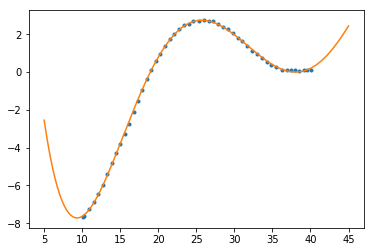

In [10]:
# a = np.poly1d([1.24e-4, -9.28e-3, 2.02e-1, -7.92e-1, -8.08])
# a = np.poly1d([-3.9816e-06, 5.22e-4, -2.4123e-2, 4.5666e-1, -2.75987, -2.54728])
# a = np.poly1d([-3.98164e-6, 7.2108e-4, -4.8985e-2, 1.53337, -2.1417e1, 1.004588e2])
a= np.poly1d([-3.98164e-6, 6.21541e-4, -3.5558475e-2, 9.017854e-1, -9.40916215, 2.602268e1])
xp = np.linspace(5, 45, 1000)
_ = plt.plot(x, ynew, '.', xp, a(xp), '-')

In [11]:
d

poly1d([ -1.99081985e-05,   2.48616485e-03,  -1.06675426e-01,
         1.80357080e+00,  -9.40916215e+00])

In [12]:
-3.98163970e-06*5

-1.99081985e-05

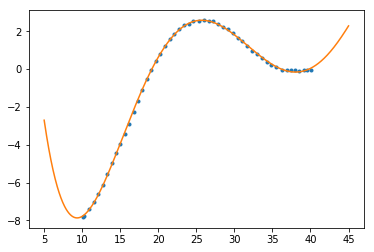

In [13]:
order = 5
plt.figure()
p = np.poly1d(np.polyfit(x, y, order))
xp = np.linspace(5, 45, 1000)
_ = plt.plot(x, y, '.', xp, p(xp), '-')

In [14]:
name_list = ["DOPC", "POPC", "DMPC", "DPPC"]

-----------DOPC---------------

[ 31.34515566  29.38145983  18.39309138   8.8397117 ]
[-5.7070541910991084e-05, 0.0062748646048663486, -0.26036646710691541, 4.9871114634616172, -42.728596848012032, 127.45338021726171]


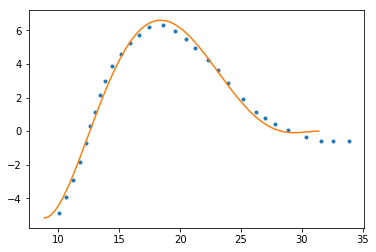

In [143]:
name = "DOPC"
print(f"-----------{name}---------------\n")
a = pd.read_csv(f"/Users/weilu/opt/pulling/{name}.csv", names=["x", "y"])
x = a.values[:,0] + 10
y = a.values[:,1]

order = 5

p = np.poly1d(np.polyfit(x, y, order))
# plt.figure()
# xp = np.linspace(5, 35, 1000)
# _ = plt.plot(x, y, '.', xp, p(xp), '-')
d = np.polyder(p, m=1)
roots = np.roots(d)
print(roots)
# plt.figure()
# xp = np.linspace(5, 35, 1000)
# _ = plt.plot(xp, d(xp), '-')
assert roots[(roots > 30) * (roots < 45)].shape == (1,)
right_bound = roots[(roots > 30) * (roots < 45)][0]

#     assert roots[(roots > 5) * (roots < 12)].shape == (1,)
#     left_bound = roots[(roots > 5) * (roots < 12)][0]
assert roots[(roots < 12)].shape == (1,)
left_bound = roots[(roots < 12)][0]

ynew = y - p(right_bound)
p = np.poly1d(np.polyfit(x, ynew, order))
print(list(p))

plt.figure()
xp = np.linspace(left_bound, right_bound, 1000)
_ = plt.plot(x[1:], ynew[1:], '.', xp, p(xp), '-')

with open(f"/Users/weilu/opt/pulling/{name}.dat", "w") as f:
    f.write(f"{left_bound:.4f} {right_bound:.4f} ")
    for i in list(p):
        f.write(f"{i:.4E} ")
    f.write("\n")

-----------POPC---------------

[ 36.91943363  31.45301826  19.72548516   7.94226698]
[-2.1153484491764462e-05, 0.0025394812083053852, -0.11315720688723852, 2.2655452171313915, -19.241612016005192, 50.726043503382741]


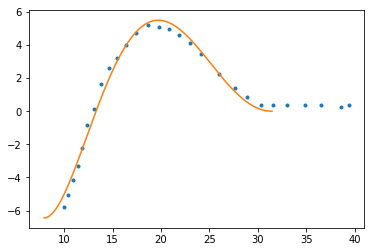

In [142]:
name = "POPC"
print(f"-----------{name}---------------\n")
a = pd.read_csv(f"/Users/weilu/opt/pulling/{name}.csv", names=["x", "y"])
x = a.values[:,0] + 10
y = a.values[:,1]

order = 5

p = np.poly1d(np.polyfit(x, y, order))
# plt.figure()
# xp = np.linspace(5, 35, 1000)
# _ = plt.plot(x, y, '.', xp, p(xp), '-')
d = np.polyder(p, m=1)
roots = np.roots(d)
print(roots)
# plt.figure()
# xp = np.linspace(5, 35, 1000)
# _ = plt.plot(xp, d(xp), '-')
assert roots[(roots > 30) * (roots < 35)].shape == (1,)
right_bound = roots[(roots > 30) * (roots < 35)][0]

#     assert roots[(roots > 5) * (roots < 12)].shape == (1,)
#     left_bound = roots[(roots > 5) * (roots < 12)][0]
assert roots[(roots < 12)].shape == (1,)
left_bound = roots[(roots < 12)][0]

ynew = y - p(right_bound)
p = np.poly1d(np.polyfit(x, ynew, order))
print(list(p))

plt.figure()
xp = np.linspace(left_bound, right_bound, 1000)
_ = plt.plot(x[1:], ynew[1:], '.', xp, p(xp), '-')

with open(f"/Users/weilu/opt/pulling/{name}.dat", "w") as f:
    f.write(f"{left_bound:.4f} {right_bound:.4f} ")
    for i in list(p):
        f.write(f"{i:.4E} ")
    f.write("\n")

-----------DMPC---------------

[ 54.78124198  37.83934426  25.59132966   9.41918114]
[-3.7672714218578164e-06, 0.00060102623050768797, -0.034888886982469315, 0.89377517298648212, -9.4119235595850768, 26.745148164127993]


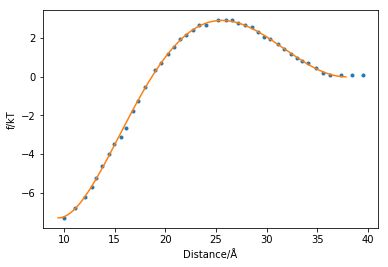

In [19]:
name = "DMPC"
print(f"-----------{name}---------------\n")
a = pd.read_csv(f"/Users/weilu/opt/pulling/{name}.csv", names=["x", "y"])
x = a.values[:,0] + 10
y = a.values[:,1]

order = 5

p = np.poly1d(np.polyfit(x, y, order))
# plt.figure()
# xp = np.linspace(5, 35, 1000)
# _ = plt.plot(x, y, '.', xp, p(xp), '-')
d = np.polyder(p, m=1)
roots = np.roots(d)
print(roots)
# plt.figure()
# xp = np.linspace(5, 35, 1000)
# _ = plt.plot(xp, d(xp), '-')
assert roots[(roots > 35) * (roots < 45)].shape == (1,)
right_bound = roots[(roots > 35) * (roots < 45)][0]

#     assert roots[(roots > 5) * (roots < 12)].shape == (1,)
#     left_bound = roots[(roots > 5) * (roots < 12)][0]
assert roots[(roots < 12)].shape == (1,)
left_bound = roots[(roots < 12)][0]

ynew = y - p(right_bound)
p = np.poly1d(np.polyfit(x, ynew, order))
print(list(p))

plt.figure()
xp = np.linspace(left_bound, right_bound, 1000)
_ = plt.plot(x, ynew, '.', xp, p(xp), '-')
plt.xlabel("Distance/Å")
plt.ylabel("f/kT")
plt.savefig("/Users/weilu/Desktop/lipid_mediated.png", dpi=300)
# with open(f"/Users/weilu/opt/pulling/{name}.dat", "w") as f:
#     f.write(f"{left_bound:.4f} {right_bound:.4f} ")
#     for i in list(p):
#         f.write(f"{i:.4E} ")
#     f.write("\n")

In [8]:
p(9.4192)

-7.3151581914473205

In [9]:
0.593*-7.3151581914473205

-4.337888807528261

-----------DPPC---------------

[ 36.12012996  30.67036402  20.3506318    8.63460335]
[-2.8250304668032809e-05, 0.0033821169092154643, -0.151585265412602, 3.0967103161280041, -27.496768894596748, 77.673524974186833]


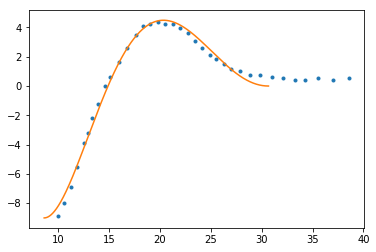

In [140]:
name = "DPPC"
print(f"-----------{name}---------------\n")
a = pd.read_csv(f"/Users/weilu/opt/pulling/{name}.csv", names=["x", "y"])
x = a.values[:,0] + 10
y = a.values[:,1]

order = 5

p = np.poly1d(np.polyfit(x, y, order))
# plt.figure()
# xp = np.linspace(5, 35, 1000)
# _ = plt.plot(x, y, '.', xp, p(xp), '-')
d = np.polyder(p, m=1)
roots = np.roots(d)
print(roots)
# plt.figure()
# xp = np.linspace(5, 35, 1000)
# _ = plt.plot(xp, d(xp), '-')
assert roots[(roots > 30) * (roots < 35)].shape == (1,)
right_bound = roots[(roots > 30) * (roots < 35)][0]

#     assert roots[(roots > 5) * (roots < 12)].shape == (1,)
#     left_bound = roots[(roots > 5) * (roots < 12)][0]
assert roots[(roots < 12)].shape == (1,)
left_bound = roots[(roots < 12)][0]

ynew = y - p(right_bound)
p = np.poly1d(np.polyfit(x, ynew, order))
print(list(p))

plt.figure()
xp = np.linspace(left_bound, right_bound, 1000)
_ = plt.plot(x[1:], ynew[1:], '.', xp, p(xp), '-')

with open(f"/Users/weilu/opt/pulling/{name}.dat", "w") as f:
    f.write(f"{left_bound:.4f} {right_bound:.4f} ")
    for i in list(p):
        f.write(f"{i:.4E} ")
    f.write("\n")

-----------DOPC---------------

[ 31.34515566  29.38145983  18.39309138   8.8397117 ]
[-5.7070541910991084e-05, 0.0062748646048663486, -0.26036646710691541, 4.9871114634616172, -42.728596848012032, 127.45338021726171]
-----------POPC---------------

[ 37.33056317  32.6349859   19.38103464   1.45354015]


AssertionError: 

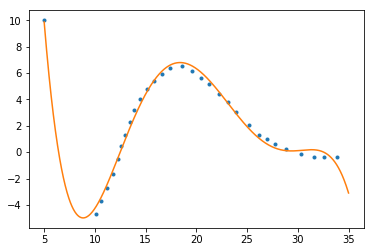

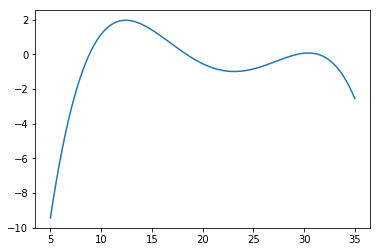

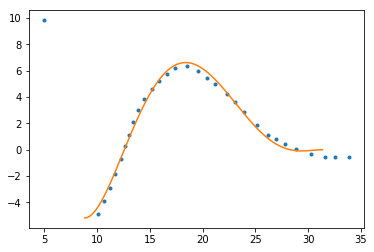

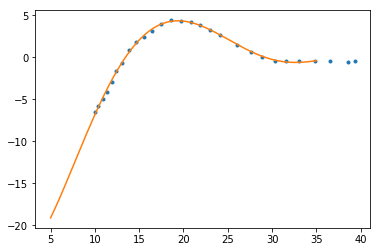

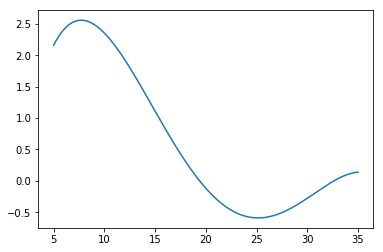

In [117]:
for name in name_list:
    print(f"-----------{name}---------------\n")
    a = pd.read_csv(f"/Users/weilu/opt/pulling/{name}.csv", names=["x", "y"])
    x = a.values[:,0] + 10
    y = a.values[:,1]

    order = 5

    p = np.poly1d(np.polyfit(x, y, order))
    plt.figure()
    xp = np.linspace(5, 35, 1000)
    _ = plt.plot(x, y, '.', xp, p(xp), '-')
    d = np.polyder(p, m=1)
    roots = np.roots(d)
    print(roots)
    plt.figure()
    xp = np.linspace(5, 35, 1000)
    _ = plt.plot(xp, d(xp), '-')
    assert roots[(roots > 30) * (roots < 45)].shape == (1,)
    right_bound = roots[(roots > 30) * (roots < 45)][0]

#     assert roots[(roots > 5) * (roots < 12)].shape == (1,)
#     left_bound = roots[(roots > 5) * (roots < 12)][0]
    assert roots[(roots < 12)].shape == (1,)
    left_bound = roots[(roots < 12)][0]

    ynew = y - p(right_bound)
    p = np.poly1d(np.polyfit(x, ynew, order))
    print(list(p))

    plt.figure()
    xp = np.linspace(left_bound, right_bound, 1000)
    _ = plt.plot(x, ynew, '.', xp, p(xp), '-')

    with open(f"/Users/weilu/opt/pulling/{name}.dat", "w") as f:
        f.write(f"{left_bound:.4f} {right_bound:.4f} ")
        for i in list(p):
            f.write(f"{i:.4E} ")
        f.write("\n")
    

[ 54.78124198  37.83934426  25.59132966   9.41918114]
[-3.7672714218578164e-06, 0.00060102623050768797, -0.034888886982469315, 0.89377517298648212, -9.4119235595850768, 26.745148164127993]


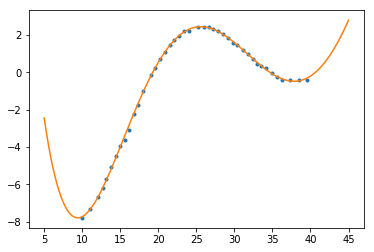

In [87]:
a = pd.read_csv("/Users/weilu/opt/pulling/DMPC.csv", names=["x", "y"])
x = a.values[:,0] + 10
y = a.values[:,1]

order = 5
plt.figure()
p = np.poly1d(np.polyfit(x, y, order))
xp = np.linspace(5, 45, 1000)
_ = plt.plot(x, y, '.', xp, p(xp), '-')

d = np.polyder(p, m=1)
roots = np.roots(d)
print(roots)

assert roots[(roots > 35) * (roots < 45)].shape == (1,)
right_bound = roots[(roots > 35) * (roots < 45)][0]

assert roots[(roots > 5) * (roots < 12)].shape == (1,)
left_bound = roots[(roots > 5) * (roots < 12)][0]

ynew = y - p(right_bound)
p = np.poly1d(np.polyfit(x, ynew, order))
print(list(p))

with open("/Users/weilu/opt/pulling/DMPC.dat", "w") as f:
    f.write(f"{left_bound:.4f} {right_bound:.4f} ")
    for i in list(p):
        f.write(f"{i:.4E} ")
    f.write("\n")

[-3.7672714218578118e-06, 0.00060102623050768732, -0.034888886982469308, 0.8937751729864819, -9.4119235595850768, 26.264693534364785]
